In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/Thyroid prediction/thyroidDF.csv')

In [ ]:
data = pd.read_csv('thyroidDF.csv')

In [ ]:
data.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

<AxesSubplot:xlabel='target', ylabel='count'>

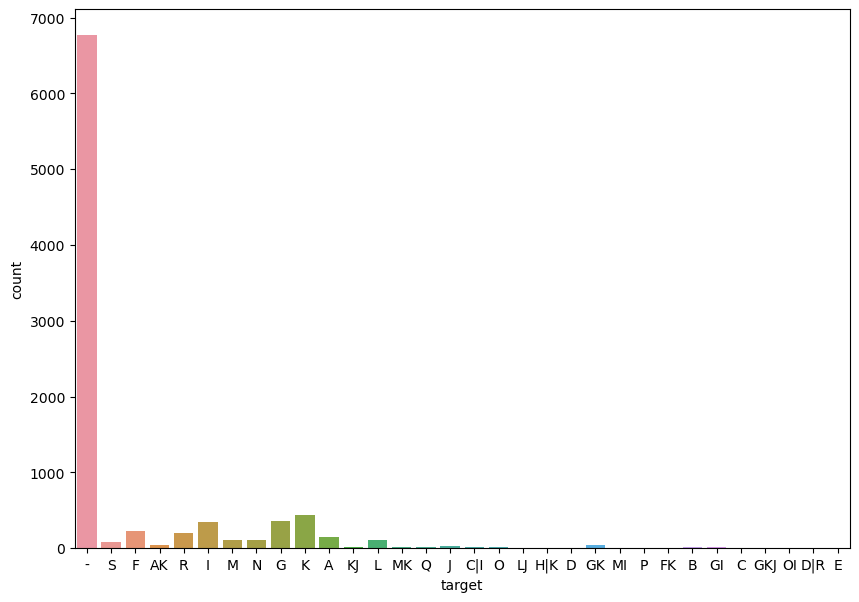

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x='target')

<AxesSubplot:>

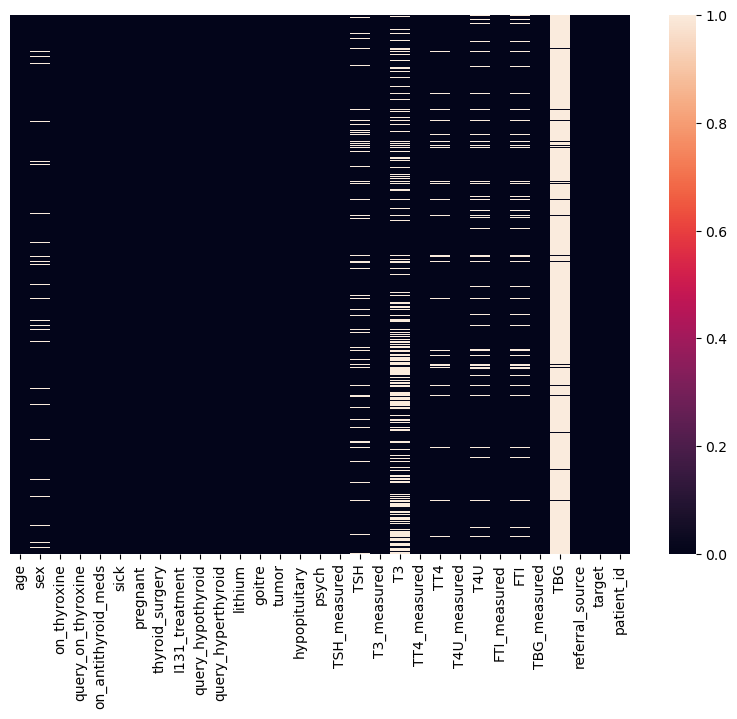

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),yticklabels=False)

Converting our target fit for binary classification

In [ ]:
def dignos(target):
    if target=='-':
        return 0
    else:
        return 1

In [ ]:
data['target']=data['target'].apply(dignos)

<AxesSubplot:xlabel='target', ylabel='count'>

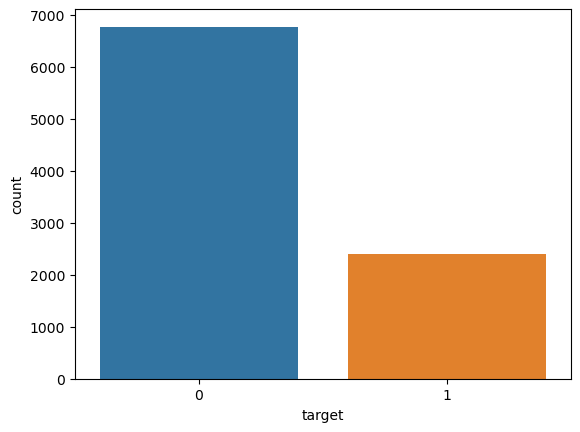

In [ ]:
sns.countplot(x='target',data=data)

In [ ]:
def impute_sex(col):
    s=col[0]
    p=col[1]
    if pd.isnull(s):
        if p=='t':
            return 'F'
        else:
            return 'M'
    else:
        return s

In [ ]:
data['sex']=data[['sex','pregnant']].apply(impute_sex,axis=1)

<AxesSubplot:xlabel='sex', ylabel='count'>

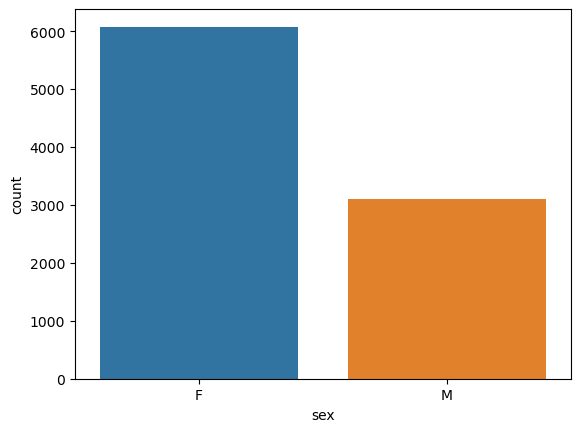

In [ ]:
sns.countplot(data=data,x='sex')

<AxesSubplot:>

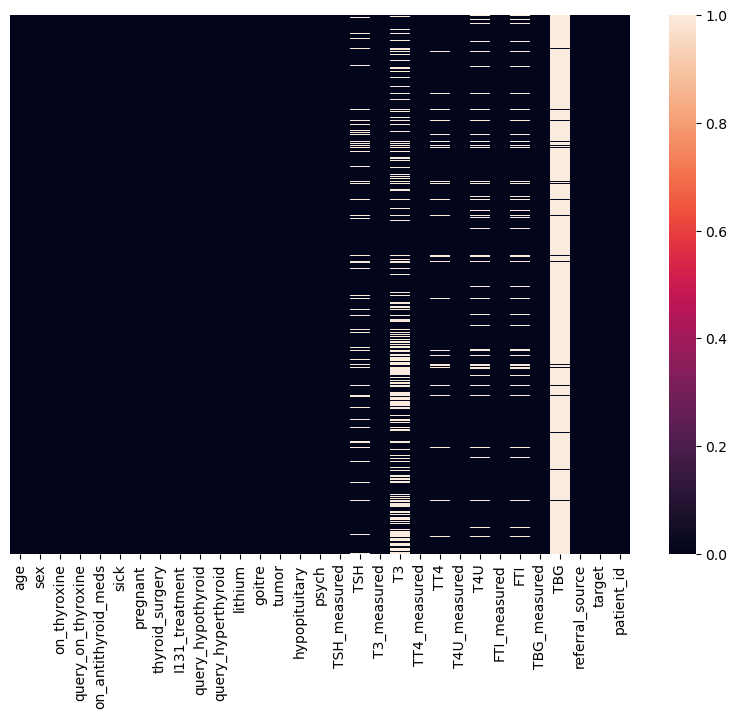

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),yticklabels=False)

In [ ]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

C:\Users\kesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='patient_id', ylabel='count'>

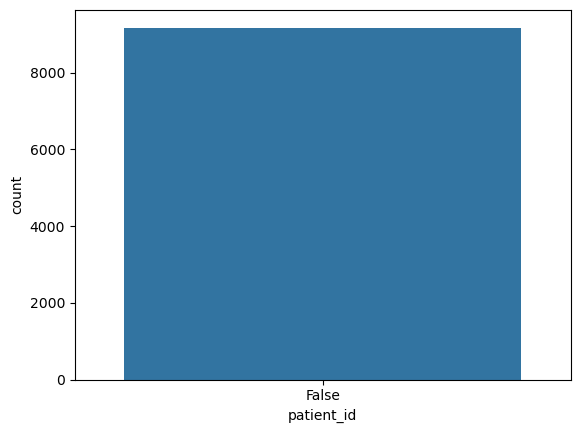

In [ ]:
sns.countplot(data['patient_id'].duplicated())

In [ ]:
data.drop( ['TSH_measured','T3_measured', 'TT4_measured', 'T4U_measured','FTI_measured', 'TBG_measured', 'referral_source', 'patient_id'],inplace=True,axis=1)

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,0
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,0
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,0
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,0
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,1


<AxesSubplot:>

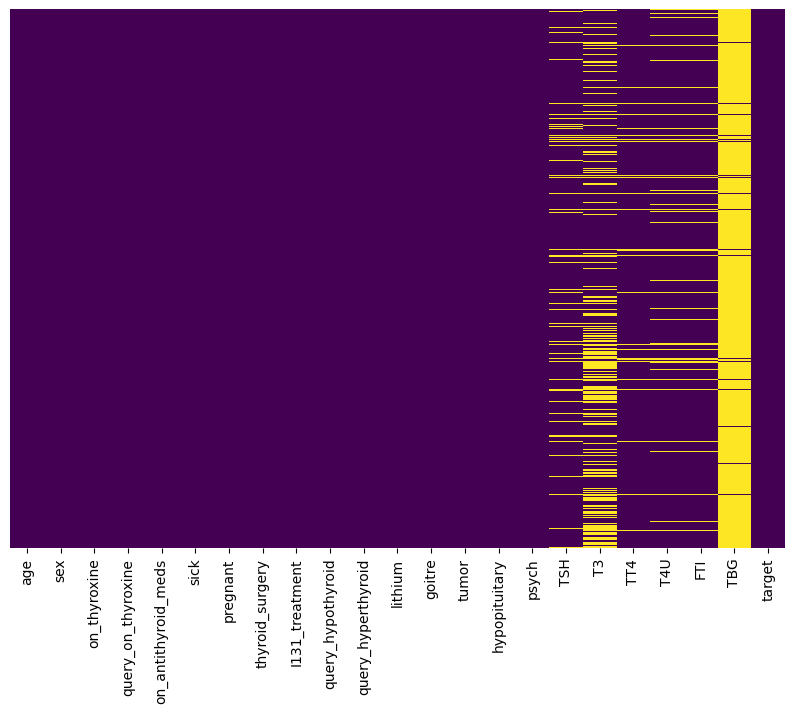

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data.drop('TBG',inplace =True,axis=1)

<AxesSubplot:>

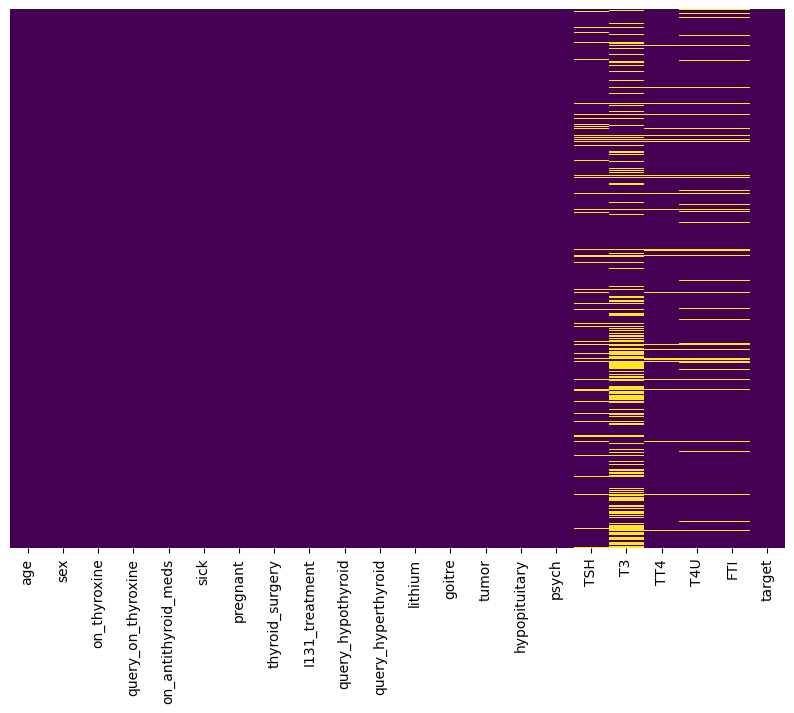

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data['missing_count']=data.isnull().sum(axis=1)

<AxesSubplot:xlabel='missing_count', ylabel='Count'>

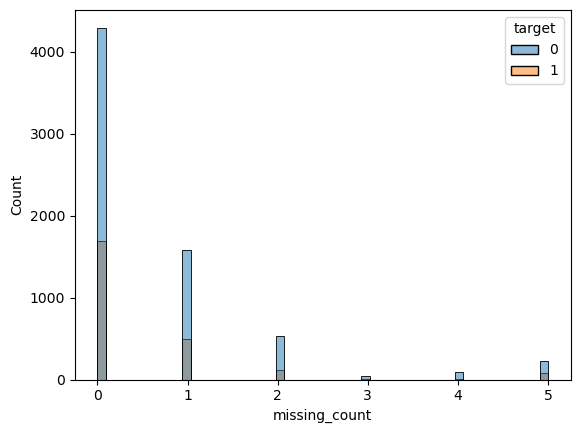

In [ ]:
sns.histplot(data,x='missing_count',hue='target')

In [ ]:
data.drop(data.index[data['missing_count']>2],inplace=True)

In [ ]:
data.drop('missing_count',inplace=True,axis=1)

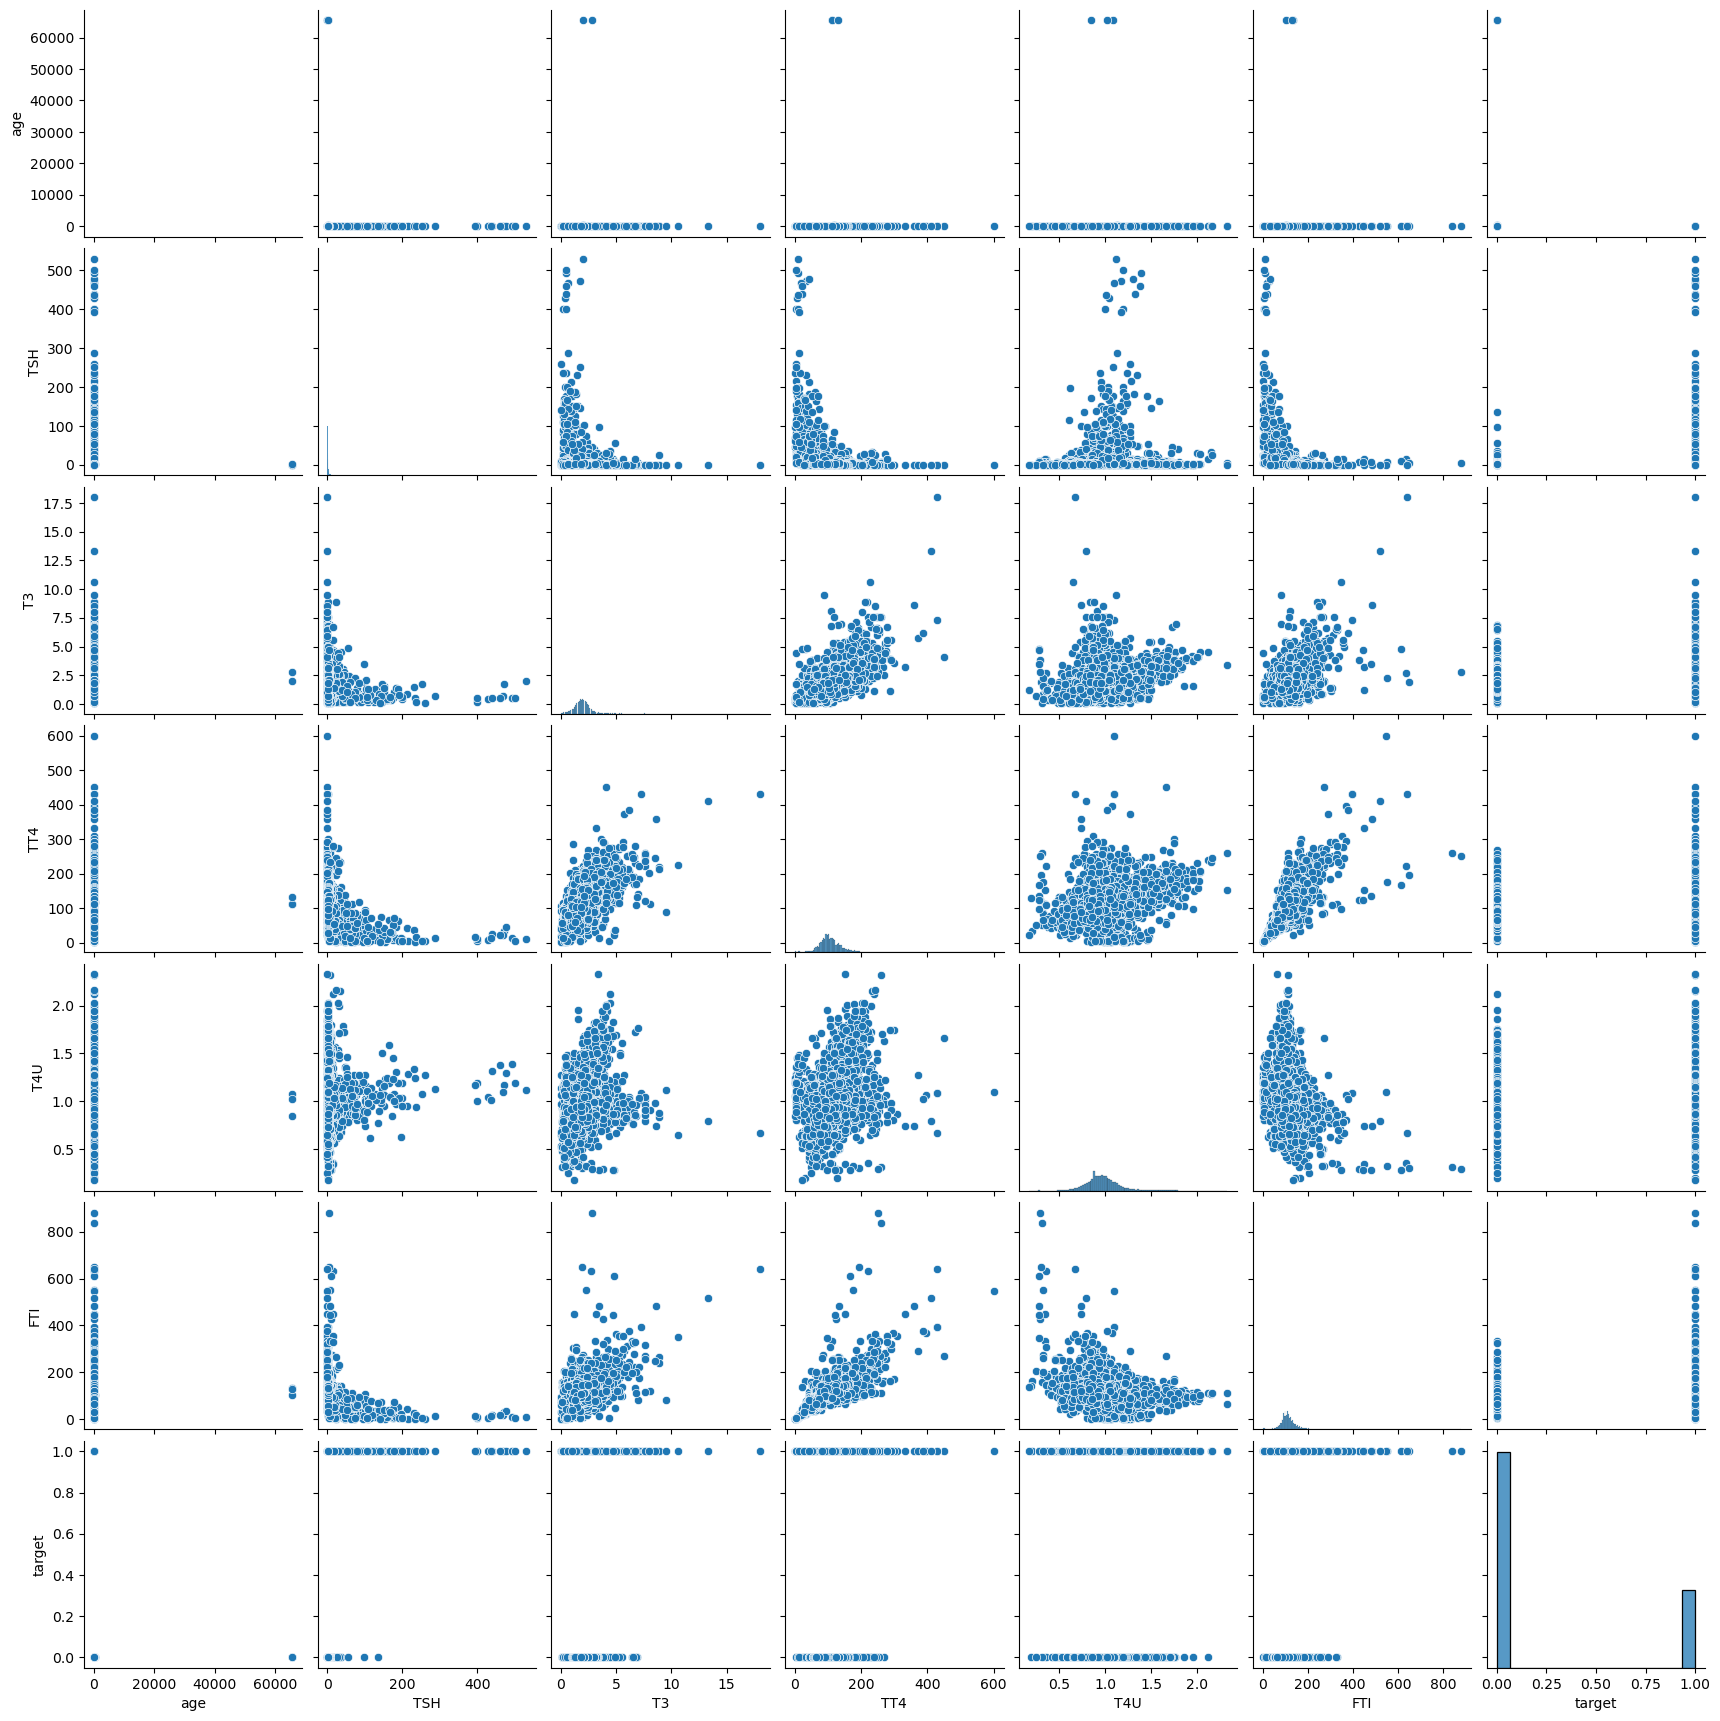

In [ ]:
sns.pairplot(data)

In [ ]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,target
count,8706.000000,8254.000000,6475.000000,8699.000000,8361.000000,8368.000000,8706.000000
mean,75.034229,5.174796,1.966856,108.649806,0.976094,113.637194,0.264186
std,1215.228246,24.099477,0.885923,37.490760,0.200369,41.555376,0.440924
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.000000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,0.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,0.000000
75%,68.000000,2.700000,2.300000,126.000000,1.070000,128.000000,1.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8706 entries, 1 to 9171
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  8706 non-null   int64  
 1   sex                  8706 non-null   object 
 2   on_thyroxine         8706 non-null   object 
 3   query_on_thyroxine   8706 non-null   object 
 4   on_antithyroid_meds  8706 non-null   object 
 5   sick                 8706 non-null   object 
 6   pregnant             8706 non-null   object 
 7   thyroid_surgery      8706 non-null   object 
 8   I131_treatment       8706 non-null   object 
 9   query_hypothyroid    8706 non-null   object 
 10  query_hyperthyroid   8706 non-null   object 
 11  lithium              8706 non-null   object 
 12  goitre               8706 non-null   object 
 13  tumor                8706 non-null   object 
 14  hypopituitary        8706 non-null   object 
 15  psych                8706 non-null   o

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128.0,NaN,NaN,0
7,28,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.7,2.6,116.0,NaN,NaN,0
8,28,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.2,1.8,76.0,NaN,NaN,0
9,28,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.9,1.7,83.0,NaN,NaN,0
10,54,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.9,2.3,133.0,NaN,NaN,0


In [ ]:
import numpy as np

In [ ]:
data.replace('f', 0, inplace=True)
data.replace('t', 1, inplace=True)

data.replace('M', 0, inplace=True)
data.replace('F', 1, inplace=True)

data.replace(np.nan, 0,inplace=True)

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
1,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.6,1.9,128.0,0.0,0.0,0
7,28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.7,2.6,116.0,0.0,0.0,0
8,28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.2,1.8,76.0,0.0,0.0,0
9,28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.9,1.7,83.0,0.0,0.0,0
10,54,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.9,2.3,133.0,0.0,0.0,0


In [ ]:
data.drop(data.index[data['age']>100],inplace=True)

<AxesSubplot:xlabel='sex', ylabel='age'>

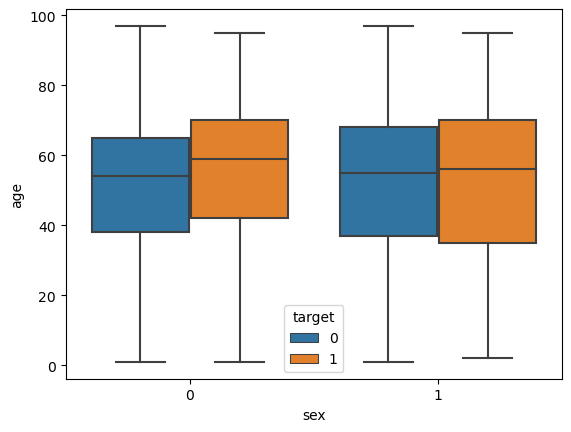

In [ ]:
sns.boxplot(data=data,y='age',x='sex',hue='target')

In [ ]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'target'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='age'>

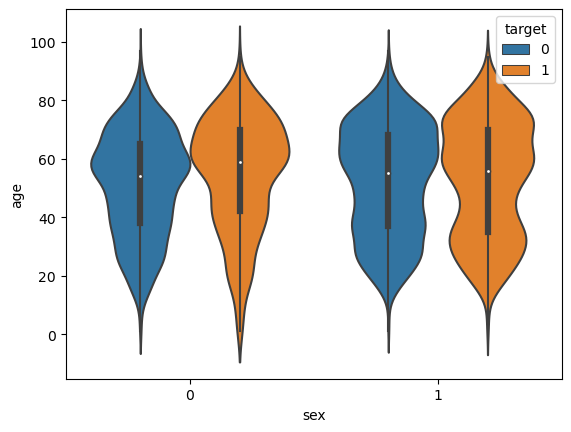

In [ ]:
sns.violinplot(y='age',x='sex',data=data,hue='target')

In [ ]:
X=data.drop('target',axis=1)
y=data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr=LogisticRegression(max_iter=2000)

In [ ]:
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
predict_lr = model_lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(confusion_matrix(y_test,predict_lr))
print(classification_report(y_test,predict_lr))

[[1874   31]
 [ 421  285]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1905
           1       0.90      0.40      0.56       706

    accuracy                           0.83      2611
   macro avg       0.86      0.69      0.73      2611
weighted avg       0.84      0.83      0.80      2611



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt=DecisionTreeClassifier()

In [ ]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predict_dt=model_dt.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predict_dt))
print(classification_report(y_test,predict_dt))

[[1844   61]
 [  80  626]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1905
           1       0.91      0.89      0.90       706

    accuracy                           0.95      2611
   macro avg       0.93      0.93      0.93      2611
weighted avg       0.95      0.95      0.95      2611



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf=RandomForestClassifier()

In [ ]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
predict_rf=model_rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predict_rf))
print(classification_report(y_test,predict_rf))

[[1843   62]
 [  52  654]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1905
           1       0.91      0.93      0.92       706

    accuracy                           0.96      2611
   macro avg       0.94      0.95      0.94      2611
weighted avg       0.96      0.96      0.96      2611



In [ ]:
from sklearn.svm import SVC

In [ ]:
model_sv=SVC()

In [ ]:
model_sv.fit(X_train,y_train)

SVC()

In [ ]:
predict_sv=model_sv.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predict_sv))
print(classification_report(y_test,predict_sv))

[[1867   38]
 [ 431  275]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1905
           1       0.88      0.39      0.54       706

    accuracy                           0.82      2611
   macro avg       0.85      0.68      0.71      2611
weighted avg       0.83      0.82      0.79      2611



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}

In [ ]:
model_gsv=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
model_gsv.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.738 total time=   2.4s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.739 total time=   2.2s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.738 total time=   2.3s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.738 total time=   2.3s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.738 total time=   2.4s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.738 total time=   1.6s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.739 total time=   1.5s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.738 total time=   1.7s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.738 total time=   1.5s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.738 total time=   1.6s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.747 total time=   0.7s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ...................C=1000, gamma=1;, score=0.738 total time=   2.7s
[CV 3/5] END ...................C=1000, gamma=1;, score=0.737 total time=   2.5s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.738 total time=   2.5s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.738 total time=   2.7s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.725 total time=   1.8s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.732 total time=   1.9s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.737 total time=   1.8s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.732 total time=   2.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.730 total time=   1.8s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.807 total time=   1.1s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.813 total time=   1.1s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.815 total time=   1.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [ ]:
model_gsv.best_params_

{'C': 100, 'gamma': 0.001}

In [ ]:
model_gsv.best_estimator_

SVC(C=100, gamma=0.001)

In [ ]:
predict_gsv=model_gsv.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predict_gsv))
print(classification_report(y_test,predict_gsv))

[[1845   60]
 [ 247  459]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1905
           1       0.88      0.65      0.75       706

    accuracy                           0.88      2611
   macro avg       0.88      0.81      0.84      2611
weighted avg       0.88      0.88      0.88      2611



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model_et=ExtraTreesClassifier()

In [ ]:
model_et.fit(X_train,y_train)

ExtraTreesClassifier()

In [ ]:
predict_et=model_et.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predict_et))
print(classification_report(y_test,predict_et))

[[1852   53]
 [ 163  543]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1905
           1       0.91      0.77      0.83       706

    accuracy                           0.92      2611
   macro avg       0.92      0.87      0.89      2611
weighted avg       0.92      0.92      0.91      2611



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_nb = GaussianNB()

In [ ]:
model_nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
predict_nb=model_nb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predict_nb))
print(classification_report(y_test,predict_nb))

[[1730  175]
 [ 378  328]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1905
           1       0.65      0.46      0.54       706

    accuracy                           0.79      2611
   macro avg       0.74      0.69      0.70      2611
weighted avg       0.78      0.79      0.78      2611



In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001] ,'kernel':['linear', 'rbf', 'sigmoid']}

In [ ]:
model_gsvk=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
model_gsvk.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.819 total time=   9.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.828 total time=   8.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.808 total time=  10.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.814 total time=   8.8s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.825 total time=  10.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.738 total time=   2.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   2.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.738 total time=   2.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.738 total time=   2.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.738 total time=   2.2s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.738 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.739 total time=   0.3s
[CV 3/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.738 total time=   0.5s
[CV 4/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.738 total time=   0.3s
[CV 5/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.738 total time=   0.3s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.818 total time=  57.1s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.828 total time=  43.8s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.806 total time=  56.4s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.813 total time=  56.9s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.826 total time= 1.1min
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.864 total time=   0.7s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.868 total time=   0.6s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.870 total time=   0.7s
[CV 4/5] END .......C=1, gam

In [ ]:
model_gsvk.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
model_gsvk.best_estimator_

In [ ]:
predict_gsvk=model_gsvk.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predict_gsvk))
print(classification_report(y_test,predict_gsvk))

In [ ]:
from imblearn.over_sampling import SVMSMOTE

In [ ]:
smote=SVMSMOTE(k_neighbors=50,m_neighbors=25)

C:\Users\kesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

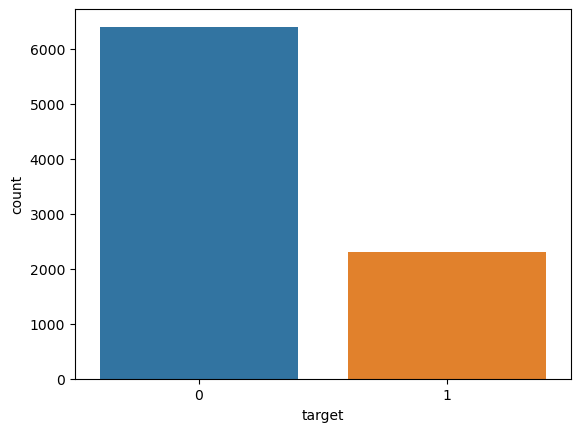

In [ ]:
sns.countplot(y)

In [ ]:
smote.fit(X,y)

SVMSMOTE(k_neighbors=50, m_neighbors=25)

In [ ]:
X_resample,y_resample=smote.fit_resample(X,y)

C:\Users\kesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

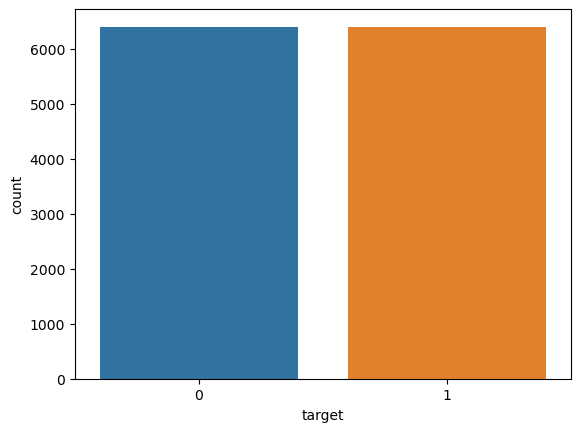

In [ ]:
sns.countplot(y_resample)

In [ ]:
data_resample=X_resample+y_resample

In [ ]:
data_resample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12804 entries, 0 to 12803
Columns: 12825 entries, 0 to tumor
dtypes: float64(12825)
memory usage: 1.2 GB


In [ ]:
 X_Rtrain, X_Rtest, y_Rtrain, y_Rtest = train_test_split(X_resample, y_resample, test_size=0.3, random_state=19)

In [ ]:
model_lr.fit(X_Rtrain,y_Rtrain)

LogisticRegression(max_iter=2000)

In [ ]:
predict_lr_r=model_lr.predict(X_Rtest)

In [ ]:
print(confusion_matrix(y_test,predict_lr))
print(classification_report(y_test,predict_lr))

[[1874   31]
 [ 421  285]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1905
           1       0.90      0.40      0.56       706

    accuracy                           0.83      2611
   macro avg       0.86      0.69      0.73      2611
weighted avg       0.84      0.83      0.80      2611



In [ ]:
print(confusion_matrix(y_Rtest,predict_lr_r))
print(classification_report(y_Rtest,predict_lr_r))

[[1537  385]
 [ 620 1300]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1922
           1       0.77      0.68      0.72      1920

    accuracy                           0.74      3842
   macro avg       0.74      0.74      0.74      3842
weighted avg       0.74      0.74      0.74      3842



In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(data.drop('target',axis=1))

StandardScaler()

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
1,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.6,1.9,128.0,0.0,0.0,0
7,28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.7,2.6,116.0,0.0,0.0,0
8,28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.2,1.8,76.0,0.0,0.0,0
9,28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.9,1.7,83.0,0.0,0.0,0
10,54,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.9,2.3,133.0,0.0,0.0,0


In [ ]:
scaled_data=scaler.transform(data.drop('target',axis=1))

In [ ]:
scaled_data.shape

(8702, 21)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
data_pca=pca.transform(scaled_data)

In [ ]:
data_pca.shape

(8702, 2)

In [ ]:
data_comp=pd.DataFrame(pca.components_,columns=X.columns)

In [ ]:
data_comp.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,-0.089729,0.157660,0.185303,-0.008869,0.049599,-0.053779,0.197945,-0.001655,0.008950,-0.029556,...,-0.030201,0.013414,0.085050,-0.002417,-0.007215,-0.242306,0.283817,0.598142,0.318519,0.503663
1,-0.321898,0.348725,-0.028851,-0.074922,0.193901,-0.113871,0.430124,0.120518,0.009992,0.058721,...,-0.026704,0.099122,0.262914,-0.013693,-0.116019,0.353685,0.063723,-0.159065,0.317336,-0.349672


In [ ]:
data_comp.shape

(2, 21)

<AxesSubplot:>

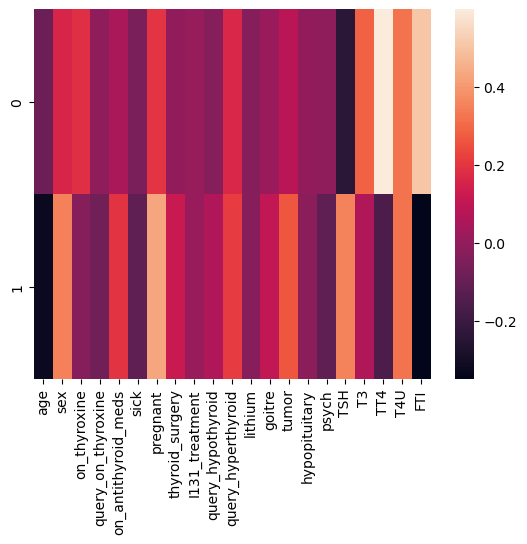

In [ ]:
sns.heatmap(data_comp)

In [ ]:
X_ptrain, X_ptest, y_ptrain, y_ptest = train_test_split(data_pca, data['target'], test_size=0.3, random_state=19)

In [ ]:
model_lr.fit(X_ptrain,y_ptrain)

LogisticRegression(max_iter=2000)

In [ ]:
predict_lr_p=model_lr.predict(X_ptest)

In [ ]:
print(confusion_matrix(y_test,predict_lr))
print(classification_report(y_test,predict_lr))

[[1874   31]
 [ 421  285]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1905
           1       0.90      0.40      0.56       706

    accuracy                           0.83      2611
   macro avg       0.86      0.69      0.73      2611
weighted avg       0.84      0.83      0.80      2611



In [ ]:
print(confusion_matrix(y_test,predict_lr_p))
print(classification_report(y_test,predict_lr_p))

[[1894   11]
 [ 685   21]]
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      1905
           1       0.66      0.03      0.06       706

    accuracy                           0.73      2611
   macro avg       0.70      0.51      0.45      2611
weighted avg       0.71      0.73      0.63      2611



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators=200)
model_gb.fit(X_train,y_train)
predict_gb=model_gb.predict(X_test)
print(confusion_matrix(y_test,predict_gb))
print(classification_report(y_test,predict_gb))

[[1835   70]
 [  50  656]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1905
           1       0.90      0.93      0.92       706

    accuracy                           0.95      2611
   macro avg       0.94      0.95      0.94      2611
weighted avg       0.95      0.95      0.95      2611

